In [29]:
#比較SVM、Logistic Regression、RandomForest用在預測急診生死問題

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# 資料已去識別化
data = pd.read_excel('C:/Users/annas/Desktop/複製的Trauma個案資料(每月給安倫)/Trauma個案資料(每月給安倫)/all/all_input_and_result_0410_until2018_TRSSpython_5is2.xlsx')




In [180]:
def LR_ROC(x_train, y_train,x_test,y_test):
    from sklearn.metrics import confusion_matrix
    classifier = LogisticRegression(penalty='l1',C=1,random_state=0,solver ='liblinear',class_weight={0:0.03,1:1})#,solver ='lbfgs'
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print('confusion_matrix')
    print(confusion_matrix)
    from sklearn.metrics import accuracy_score
    print('accuracy_score',accuracy_score(y_test, y_pred))
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
    print('auc',logit_roc_auc);
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression  (area = %0.7f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    from pandas import Series,DataFrame
    import pandas as pd
    # 印出係數
    print(classifier.coef_)
    # 印出截距
    print(classifier.intercept_ )


    df1  = pd.DataFrame(classifier.coef_.T,index=x_train.columns,columns=['係數'])
    return df1 
    
    
def SVM(x_train, y_train,x_test,y_test):
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(x_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    
    x_train = X_train_minmax
    x_test = X_train_minmax
    
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    classifier = SVC(probability=True)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print('confusion_matrix')
    print(confusion_matrix)
    from sklearn.metrics import accuracy_score
    print('accuracy_score',accuracy_score(y_test, y_pred))
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    #logit_roc_auc = roc_auc_score(y, classifier.predict(data))
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    print('auc',logit_roc_auc);
    #print('j',j)
    #fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(data)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
def RF(x_train, y_train,x_test,y_test):
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(x_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    
    x_train = X_train_minmax
    x_test = X_train_minmax
    
    
    from sklearn.metrics import confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print('confusion_matrix')
    print(confusion_matrix)
    from sklearn.metrics import accuracy_score

    print('accuracy_score',accuracy_score(y_test, y_pred))


    logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    print('auc',logit_roc_auc);

#     tr_y_pre=classifier.predict(X_test)
    tr_y_proba=classifier.predict_proba(X_test)

    fpr,tpr,threasholds=roc_curve(y_test,tr_y_proba[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label='RandomForest(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()




In [181]:
X_train = data.loc[0:6069,data.columns[0:26]]
pluse_pressure_train =  data.loc[0:6069,data.columns[22:23]]
pre_pluse_pressure_train = data.loc[0:6069,data.columns[23:24]]
pulse_division_systolic_train = data.loc[0:6069,data.columns[24:25]]
pre_pulse_division_systolic_train = data.loc[0:6069,data.columns[25:26]]
comp_train  = data.loc[0:6069,data.columns[26:27]] 
icu_los_1_train = data.loc[0:6069,data.columns[27:28]]
los_train = data.loc[0:6069,data.columns[28:29]]
RTS_train = data.loc[0:6069,data.columns[29:30]]
ISS_train = data.loc[0:6069,data.columns[30:31]]
NISS_train = data.loc[0:6069,data.columns[31:32]]
TRISS_train = data.loc[0:6069,data.columns[32:33]]
q_sofa_train = data.loc[0:6069,data.columns[33:34]]
Y_train = data.loc[0:6069,data.columns[34:35]]

X_test = data.loc[6070:8089,data.columns[0:26]]
pluse_pressure_test =  data.loc[6070:8089,data.columns[22:23]]
pre_pluse_pressure_test = data.loc[6070:8089,data.columns[23:24]]
pulse_division_systolic_test = data.loc[6070:8089,data.columns[24:25]]
pre_pulse_division_systolic_test = data.loc[6070:8089,data.columns[25:26]]
comp_test  = data.loc[6070:8089,data.columns[26:27]] 
icu_los_1_test = data.loc[6070:8089,data.columns[27:28]]
los_test = data.loc[6070:8089,data.columns[28:29]]
RTS_test = data.loc[6070:8089,data.columns[29:30]]
ISS_test = data.loc[6070:8089,data.columns[30:31]]
NISS_test = data.loc[6070:8089,data.columns[31:32]]
TRISS_test = data.loc[6070:8089,data.columns[32:33]]
q_sofa_test = data.loc[6070:8089,data.columns[33:34]]
Y_test = data.loc[6070:8089,data.columns[34:35]]



LR


D:\ANACONDA\envs\tensorflowgpu\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion_matrix
[[874 733]
 [ 21 392]]
accuracy_score 0.6267326732673267
auc 0.7465115543227194


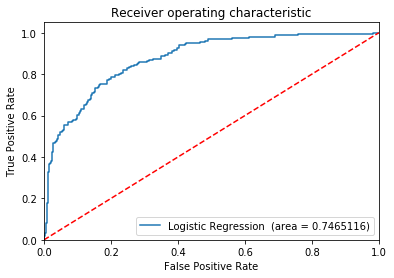

[[-2.15371067e-01  6.36067609e-03  0.00000000e+00  5.90883901e-03
  -9.71594640e-05  1.03870049e-03 -3.45510053e-01 -5.14634605e-03
   1.85256452e-02 -9.90207890e-03  8.84461832e-01  9.87236823e-01
   2.85156594e-01  2.61298058e-01  7.67120052e-03  0.00000000e+00
   0.00000000e+00  2.96167971e-01  1.97330925e-01  0.00000000e+00
   2.80833656e-01  3.09896595e+00  1.96095279e-02 -3.84832307e-03
   2.16687525e+00  2.76491306e-01]]
[2.26329511]


In [182]:
print("LR")
r = LR_ROC(X_train,Y_train,X_test,Y_test)





SVM


D:\ANACONDA\envs\tensorflowgpu\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion_matrix
[[1607    0]
 [ 370   43]]
accuracy_score 0.8168316831683168
auc 0.5520581113801453


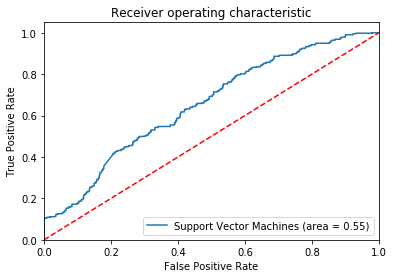

In [35]:
print("SVM")
SVM(X_train,Y_train,X_test,Y_test)



RF
confusion_matrix
[[1520   87]
 [ 229  184]]
accuracy_score 0.8435643564356435
auc 0.695691217750429


D:\ANACONDA\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:81: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


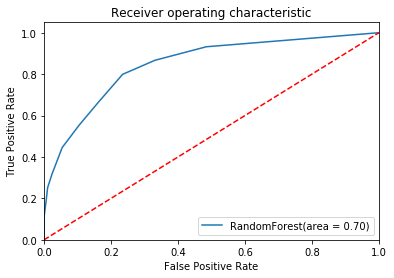

In [36]:
print("RF")
RF(X_train,Y_train,X_test,Y_test)
